In [204]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ▪ Parte 1 (imágenes en /white_patch y /coord_cromaticas):

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [205]:
def chromaticity_coordinates(image):
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_float = image_rgb.astype(np.float32) / 255.0
    sum_channels = np.sum(image_float, axis=2)
    chromaticity_x = image_float[:, :, 0] / sum_channels
    chromaticity_y = image_float[:, :, 1] / sum_channels
    chromaticity_image = np.dstack((chromaticity_x, chromaticity_y, sum_channels))
    
    return chromaticity_image

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [206]:
def white_patch(image):
    max_values = np.max(image, axis=(0, 1))
    corrected_image = image * (255.0 / max_values)
    return np.clip(corrected_image, 0, 255).astype(np.uint8)

### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

/var/folders/62/k956tb7121v1t52bjhsj036m0000gn/T/ipykernel_8175/1828991126.py:6: RuntimeWarning: invalid value encountered in divide
  chromaticity_x = image_float[:, :, 0] / sum_channels
/var/folders/62/k956tb7121v1t52bjhsj036m0000gn/T/ipykernel_8175/1828991126.py:7: RuntimeWarning: invalid value encountered in divide
  chromaticity_y = image_float[:, :, 1] / sum_channels
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


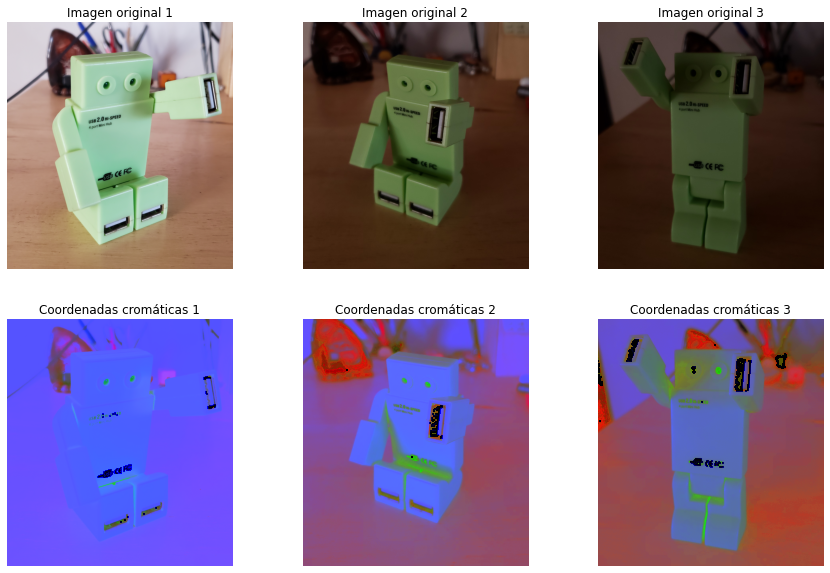

In [207]:
images = [
    'CoordCrom_1.png',
    'CoordCrom_2.png',
    'CoordCrom_3.png',
]

plt.figure(figsize=(15, 10))

for i, image_filename in enumerate(images, 1):
    image_path = './coord_cromaticas/{}'.format(image_filename)
    image = cv2.imread(image_path)

    chromaticity_image = chromaticity_coordinates(image)

    plt.subplot(2, len(images), i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen original {}'.format(i))
    plt.axis('off')

    plt.subplot(2, len(images), len(images) + i)
    plt.imshow(chromaticity_image)
    plt.title('Coordenadas cromáticas {}'.format(i))
    plt.axis('off')

plt.show()

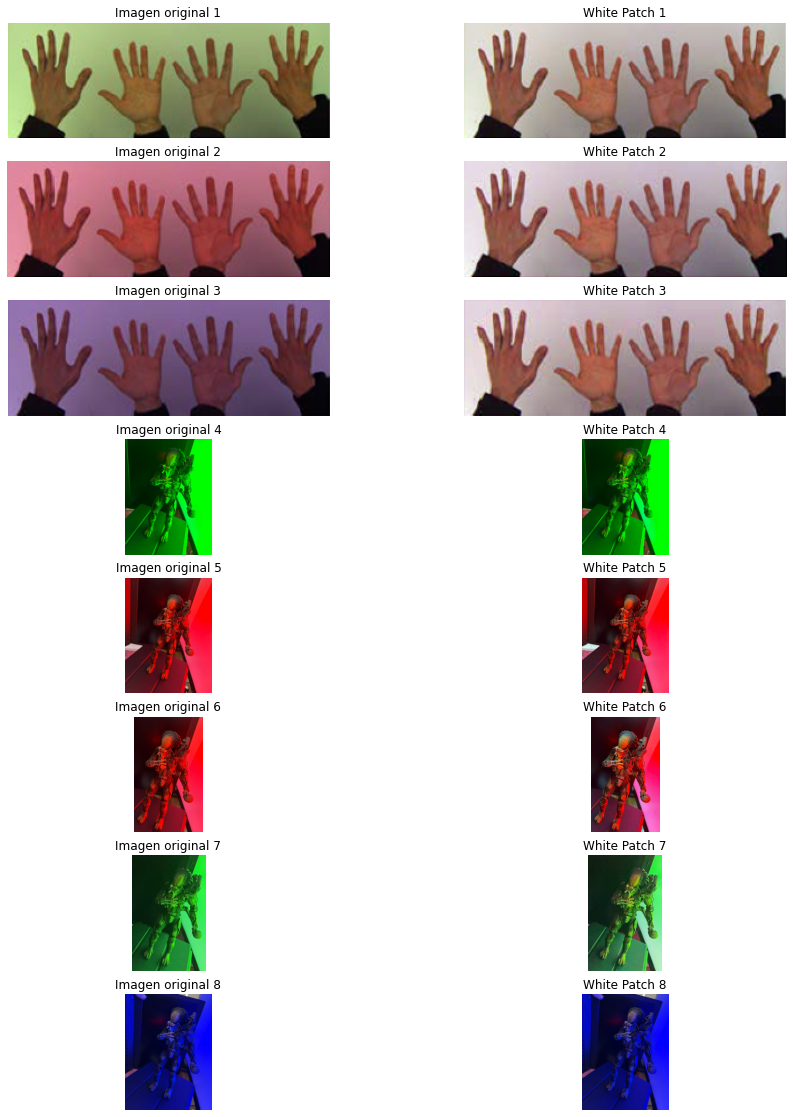

In [208]:
images = [
    'test_green.png',
    'test_red.png',
    'test_blue.png',
    'wp_green2.jpg',
    'wp_red2.jpg',
    'wp_red.png',
    'wp_green.png',
    'wp_blue.jpg',
]

plt.figure(figsize=(15, 20))

for i, image_filename in enumerate(images, 1):
    image_path = './white_patch/{}'.format(image_filename)
    image = cv2.imread(image_path)

    corrected_image = white_patch(image)

    plt.subplot(len(images), 2, 2*i - 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen original {}'.format(i))
    plt.axis('off')

    plt.subplot(len(images), 2, 2*i)
    plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
    plt.title('White Patch {}'.format(i))
    plt.axis('off')

plt.show()

El algoritmo White Patch parece funcionar bien en algunas imagenes. En las primeras 3 graficas se puede ver bien el funcionamiento.

Las imágenes corregidas parecen estar más equilibradas en términos de color y las áreas que deberían ser blancas ahora aparecen más blancas.

En imágenes donde no haya áreas blancas el algoritmo puede no funcionar.

# ▪ Parte 2:

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

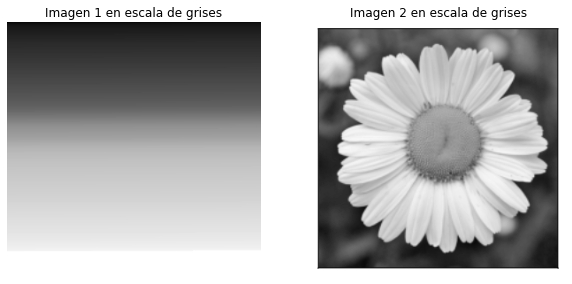

In [209]:
img_segmentacion_path = 'img1_tp.png'
img2_path = 'img2_tp.png'
img1_gray = cv2.imread(img_segmentacion_path, cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.title('Imagen 1 en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_gray, cmap='gray')
plt.title('Imagen 2 en escala de grises')
plt.axis('off')

plt.show()


### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

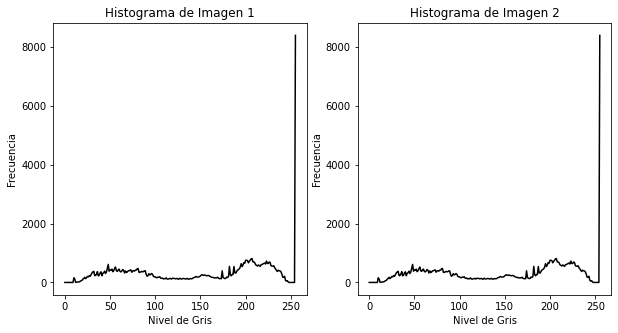

In [210]:
hist_img1 = cv2.calcHist([img1_gray], [0], None, [256], [0, 256])
hist_img2 = cv2.calcHist([img2_gray], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_img1, color='black')
plt.title('Histograma de Imagen 1')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.plot(hist_img2, color='black')
plt.title('Histograma de Imagen 2')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')

plt.show()

Se observa que ambos histogramas son identicos, por lo que se deduce que ambas imagenes tienen la misma distribución de intensidad, o similar.

Utilizar histogramas como características puede ser útil en modelos de clasificación/detección de imágenes para capturar información sobre la distribución de intensidades y patrones visuales.

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

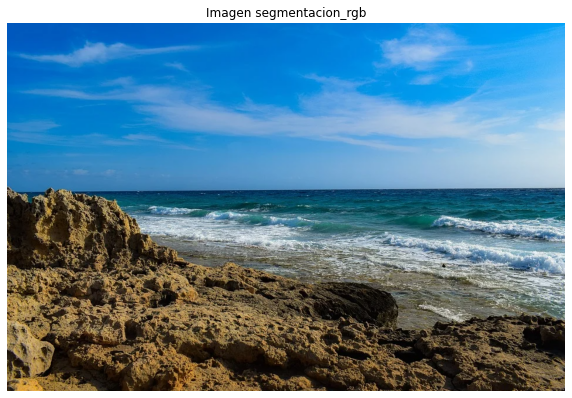

In [211]:
img_segmentacion_path = './segmentacion.png'
img_segmentacion = cv2.imread(img_segmentacion_path)
img_segmentacion_rgb = cv2.cvtColor(img_segmentacion, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 15))

plt.imshow(img_segmentacion_rgb)
plt.title('Imagen segmentacion_rgb')
plt.axis('off')

plt.show()

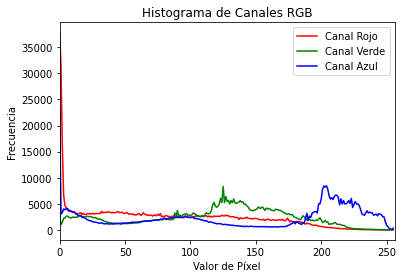

In [212]:
b, g, r = cv2.split(img_segmentacion)

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

plt.figure()
plt.title("Histograma de Canales RGB")
plt.xlabel("Valor de Píxel")
plt.ylabel("Frecuencia")
plt.plot(hist_r, color='r', label='Canal Rojo')
plt.plot(hist_g, color='g', label='Canal Verde')
plt.plot(hist_b, color='b', label='Canal Azul')
plt.legend()
plt.xlim([0, 256])
plt.show()

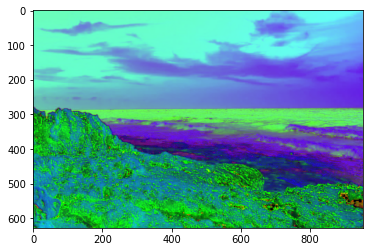

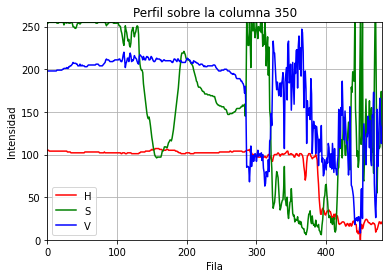

In [213]:
img_color = cv2.imread('./segmentacion.png')

imgHSV = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.figure()
plt.imshow(imgHSV)
plt.show()

plt.figure()
idx_col = 350
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='H')
plt.plot(perfil_color[:,1], color='g',label='S')
plt.plot(perfil_color[:,2], color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()

18.6768 152.6412 86.7092


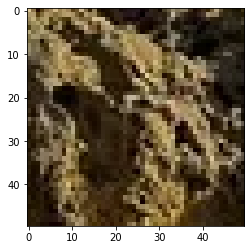

In [214]:
muestra = imgHSV[300:350, 100:150, :]

color_h_medio, color_sat_medio, color_val_medio = np.mean(muestra, axis=(0,1))
print(color_h_medio, color_sat_medio, color_val_medio)

muestra = cv2.cvtColor(cv2.cvtColor(muestra, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(muestra)
plt.show()

hue medio:18.6768


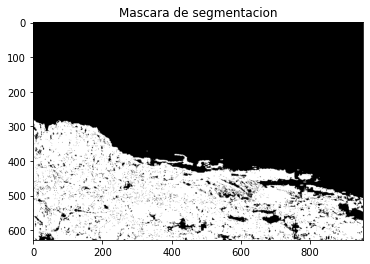

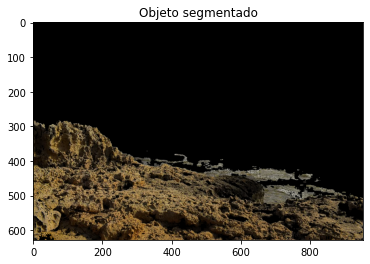

In [215]:
print(f'hue medio:{color_h_medio}')

color_l = (color_h_medio-10, 10, 10)
color_u = (color_h_medio+10, 500, 200)

mask = cv2.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

104.7513 247.9538 195.4801


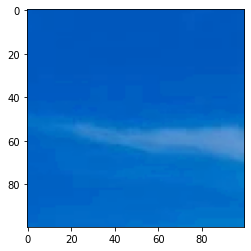

In [216]:
muestra = imgHSV[0:100, 0:100, :]
color_h_medio, color_sat_medio, color_val_medio = np.mean(muestra, axis=(0,1))
print(color_h_medio, color_sat_medio, color_val_medio)

muestra = cv2.cvtColor(cv2.cvtColor(muestra, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(muestra)
plt.show()

hue medio:104.7513


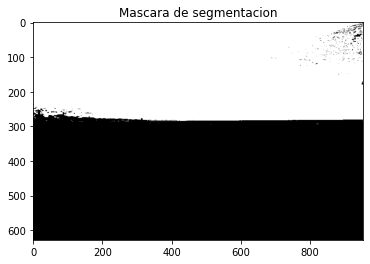

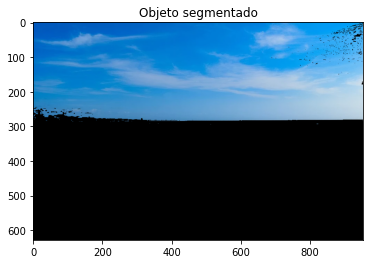

In [217]:
print(f'hue medio:{color_h_medio}')

color_l = (color_h_medio-10, 30, 180)
color_u = (color_h_medio+10, 280, 250)

mask = cv2.inRange(imgHSV, color_l,  color_u)
mask[300:, :] = 0
img_segmentada = cv2.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

98.4674 129.8401 142.8156


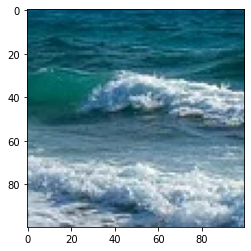

In [218]:
muestra = imgHSV[300:400, 700:800, :]
color_h_medio, color_sat_medio, color_val_medio = np.mean(muestra, axis=(0,1))
print(color_h_medio, color_sat_medio, color_val_medio)

muestra = cv2.cvtColor(cv2.cvtColor(muestra, cv2.COLOR_HSV2BGR),cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(muestra)
plt.show()

hue medio:98.4674


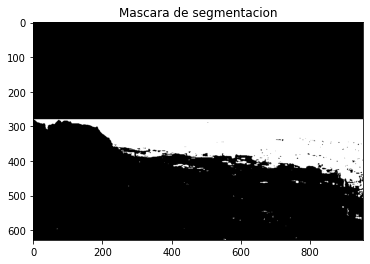

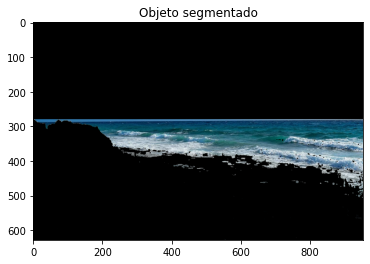

In [219]:
print(f'hue medio:{color_h_medio}')

color_l = (color_h_medio-10, 0, 0)
color_u = (color_h_medio+10, 300, 300)

mask = cv2.inRange(imgHSV, color_l,  color_u)
mask[:280, :] = 0
img_segmentada = cv2.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()